In [1]:
import numpy as np
import msprime
import tskit
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import os
import pandas as pd

In [2]:
msprime.__version__

'1.2.0'

## Ne inferred from 689 ARG

In [11]:
path_col = '~/07.estimate-popsize_reinfer-branch_breed/04.reinfer_each_beef'

In [12]:
ls_beef = ['Angus', 'Hereford', 'Charolais', 'Simmental', 'Limousin']

In [13]:
breed2coa = {}

In [14]:
for breed in ls_beef:
    with open(os.path.join(path_col, f'{breed}/Chr1_{breed}_reinfer.coal'), 'r') as f_in:
        for _ in range(2):
            next(f_in)
        breed2coa[breed] = np.array([float(coa) for coa in f_in.readline().strip().split()[2:]])

In [15]:
breed2ne = {}

In [16]:
for breed, ay in breed2coa.items():
    breed2ne[breed] = 0.5 / ay

In [17]:
with open(os.path.join(path_col, f'{breed}/Chr1_{breed}_reinfer.coal'), 'r') as f_in:
    next(f_in)
    ay_epoch = np.array([float(coa) for coa in f_in.readline().strip().split()])

In [23]:
df_ne = pd.DataFrame(breed2ne)

In [24]:
df_ne['epoch'] = ay_epoch

In [ ]:
breed2ne

{'Angus': array([ 7791.06240485,  1732.60379163,  1436.77748052,  1428.94703751,
         1511.08532192,  1709.07450198,  2027.84638658,  2354.99140428,
         2591.37176856,  2931.74315585,  3564.29997149,  4435.61264682,
         5119.2687227 ,  5623.22165615,  6558.97700947,  7743.47418713,
         9061.96024699, 10010.65133302, 10461.4547699 , 11175.68171658,
        12636.37811076, 13640.59221995, 15469.6747965 , 17022.89920401,
        19197.76384447, 20128.82447665, 21738.84688461, 22284.61915586,
        22599.68722033, 22396.81786012, 22745.26216189, 23672.0007575 ,
        23652.51615467, 27833.13479031, 32287.64416433, 34944.99657539,
        44365.17865857, 60945.80577059, 80773.74788575, 84072.18774328,
        80449.48737587, 53371.70403042, 48685.9657835 , 37487.44170703,
        44954.7305863 , 52854.12262156, 50043.73822721, 65270.91345338,
        65270.91345338]),
 'Hereford': array([ 8294.99662394,  2258.17232565,  2000.60018005,  2111.31708182,
         2323.679

In [ ]:
df_ne

,Angus,Hereford,Charolais,Simmental,Limousin,epoch
0,7791.062405,8294.996624,10870.794090,8391.190592,10413.672736,0.000000e+00
1,1732.603792,2258.172326,3584.460646,2624.107148,3462.939620,1.666670e+01
2,1436.777481,2000.600180,3116.760066,2361.587365,3065.735501,2.098210e+01
3,1428.947038,2111.317082,3057.935649,2393.925175,3046.532741,2.641490e+01
4,1511.085322,2323.679221,3124.160382,2508.088586,3173.515112,3.325440e+01
5,1709.074502,2565.707776,3279.333639,2658.626979,3369.976208,4.186480e+01
6,2027.846387,2758.970794,3564.655726,2804.120936,3804.277530,5.270460e+01
7,2354.991404,3042.417383,3899.882224,3003.381808,4305.000689,6.635120e+01
8,2591.371769,3533.968505,4340.579207,3418.055537,4864.239087,8.353120e+01
9,2931.743156,4285.114370,4901.288059,4107.518402,5373.206827,1.051600e+02


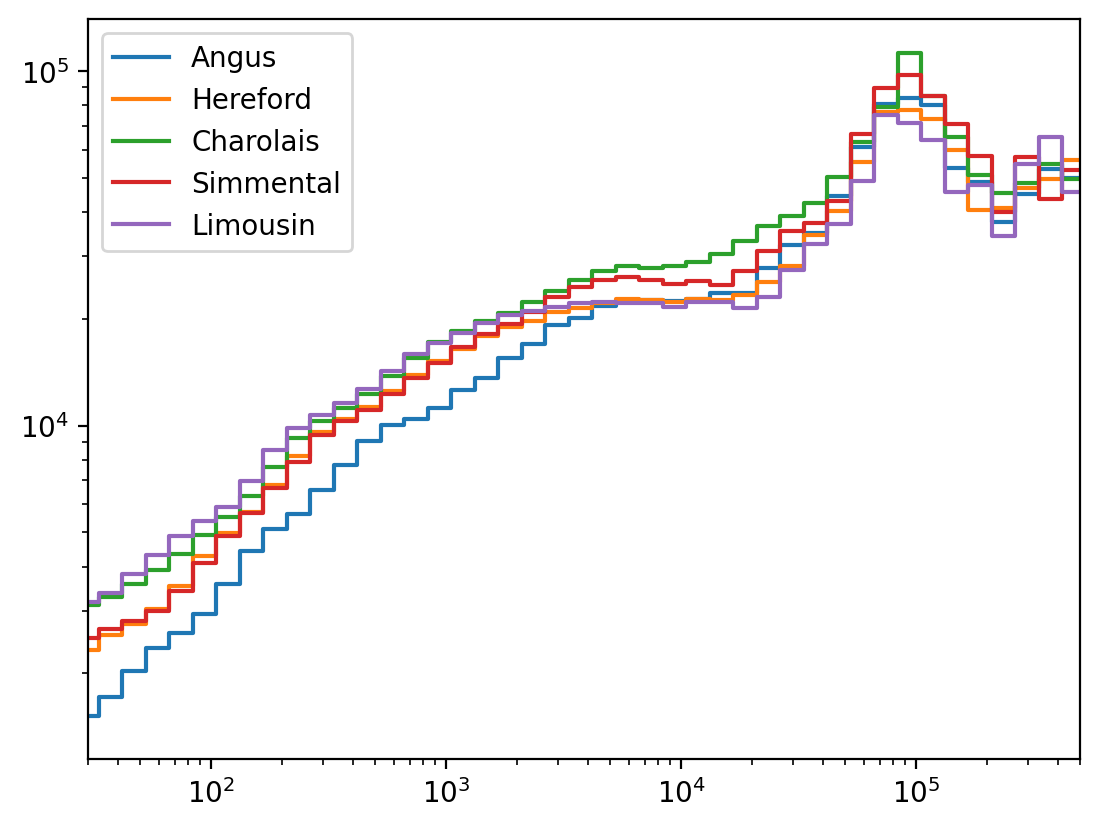

In [30]:
fig, ax = plt.subplots()
for breed in ls_beef:
    ax.step(ay_epoch, breed2ne[breed], label=breed)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=30, right=500_000)
# ax.set_ylim(top=20_000)
ax.legend()

In [33]:
ay_ne_mean = np.average(df_ne.iloc[:, :-1].values, axis=1)

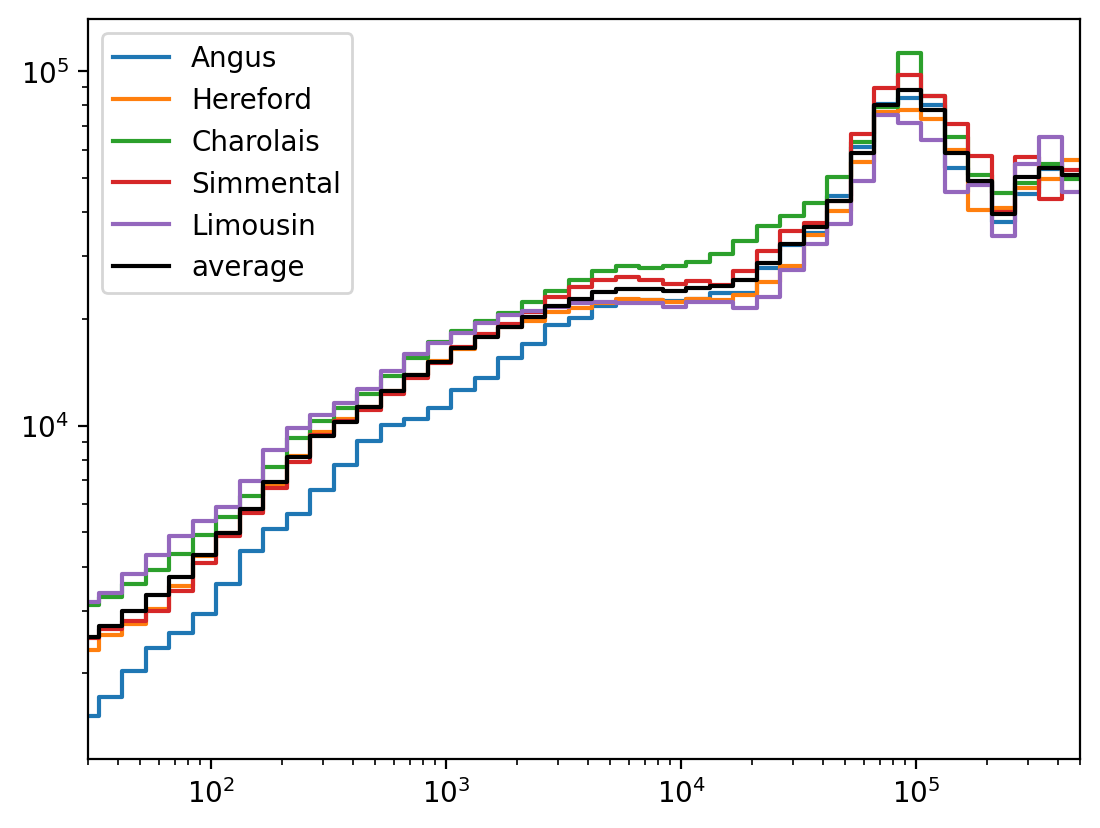

In [51]:
fig, ax = plt.subplots()
for breed in ls_beef:
    ax.step(ay_epoch, breed2ne[breed], label=breed)
ax.step(ay_epoch, ay_ne_mean, label='average', c='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=30, right=500_000)
# ax.set_ylim(top=20_000)
ax.legend()

In [43]:
for time, ne in zip(ay_epoch, ay_ne_mean):
    print(int(np.ceil(time)), int(np.ceil(ne)))

0 9153
17 2733
21 2397
27 2408
34 2529
42 2717
53 2992
67 3322
84 3750
106 4320
133 4970
167 5818
210 6944
265 8164
333 9325
419 10238
528 11287
664 12553
836 13871
1052 15142
1324 16497
1667 17758
2099 18998
2642 20191
3326 21739
4187 22784
5271 23836
6636 24315
8354 24204
10516 23895
13239 24475
16667 24760
20983 25749
26415 28807
33255 32441
41865 36349
52705 42956
66352 58914
83532 80341
105160 88639
132388 77411
166667 58905
209821 49081
264149 39613
332544 50382
418648 53173
527046 50822
663512 58184
16666700 58184


### simulation

In [35]:
tp_epoch_ne = [(0.0, 2397), (100, 4000), (333, 9325), (2000, 20000), (10516, 23836), (105160, 88639), (264149, 38613), (663512, 58184)]

In [36]:
ls_sm_epoch = [tp[0] for tp in tp_epoch_ne]

In [37]:
(1 / tp_epoch_ne[1][0]) * np.log(tp_epoch_ne[0][1] / tp_epoch_ne[1][1])

-0.005120764056676433

In [38]:
def add_pop_parm_change(demography, tp_epoch_ne, target_pop):
    demography.add_population(
        name=target_pop, 
        initial_size=tp_epoch_ne[0][1], 
        growth_rate=((1 / tp_epoch_ne[1][0]) * np.log(tp_epoch_ne[0][1] / tp_epoch_ne[1][1]))
        )
    for index, tp in enumerate(tp_epoch_ne[1:-1], start=1):
        demography.add_population_parameters_change(
            time=tp_epoch_ne[index][0], 
            population=target_pop, 
            initial_size=tp_epoch_ne[index][1], 
            growth_rate=((1 / (tp_epoch_ne[index + 1][0] - tp_epoch_ne[index][0])) * np.log(tp_epoch_ne[index][1] / tp_epoch_ne[index + 1][1]))
        )
    demography.add_population_parameters_change(time=tp_epoch_ne[-1][0], population=target_pop, initial_size=tp_epoch_ne[-1][1], growth_rate=0)

In [39]:
demography = msprime.Demography()

In [40]:
add_pop_parm_change(demography, tp_epoch_ne, target_pop='average')

In [41]:
debug = demography.debug()

In [42]:
ay_ne_adapt = debug.population_size_trajectory(np.arange(0, 527046))

In [9]:
chrom_length = 158_534_110
num_ind = 100
seed = 1
recom_rate = 1e-8
target_pop='average'

In [10]:
ts = msprime.sim_ancestry(
    samples={target_pop: num_ind}, 
    demography=demography, 
    model=[
        msprime.StandardCoalescent()
    ], 
    sequence_length=chrom_length, 
    random_seed=seed, 
    recombination_rate=recom_rate,
    end_time=1_000_000
    )

In [11]:
mut_rate = 1.26e-8

In [12]:
mts = msprime.sim_mutations(ts, rate=mut_rate, random_seed=seed)

In [14]:
with gzip.open('Average_100_individuals_Chr1_Hudson.haps.gz', 'w') as f_haps:
    for ht, site in zip(mts.genotype_matrix(), mts.sites()):
        if len(site.mutations) > 1:
            pass
        else:
            pos = int(site.position)
            aa = site.ancestral_state
            da = site.mutations[0].derived_state
            line = [str(x) for x in [1, '{:}_{:}_{:}_{:}'.format(1, pos, aa, da), pos, aa, da] + list(ht)]
            f_haps.write((' '.join(line) + '\n').encode())

## inferred ARG from simulated data

In [4]:
f_coal_infer = 'Average_100_individuals_Chr1_Hudson_pararelate_update.coal'

In [6]:
with open(f_coal_infer, 'r') as f_coal:
    next(f_coal)
    ay_epoch_infer = np.array(f_coal.readline().strip().split(), dtype=float)
    ay_coal_infer = np.array(f_coal.readline().strip().split()[2:], dtype=float)

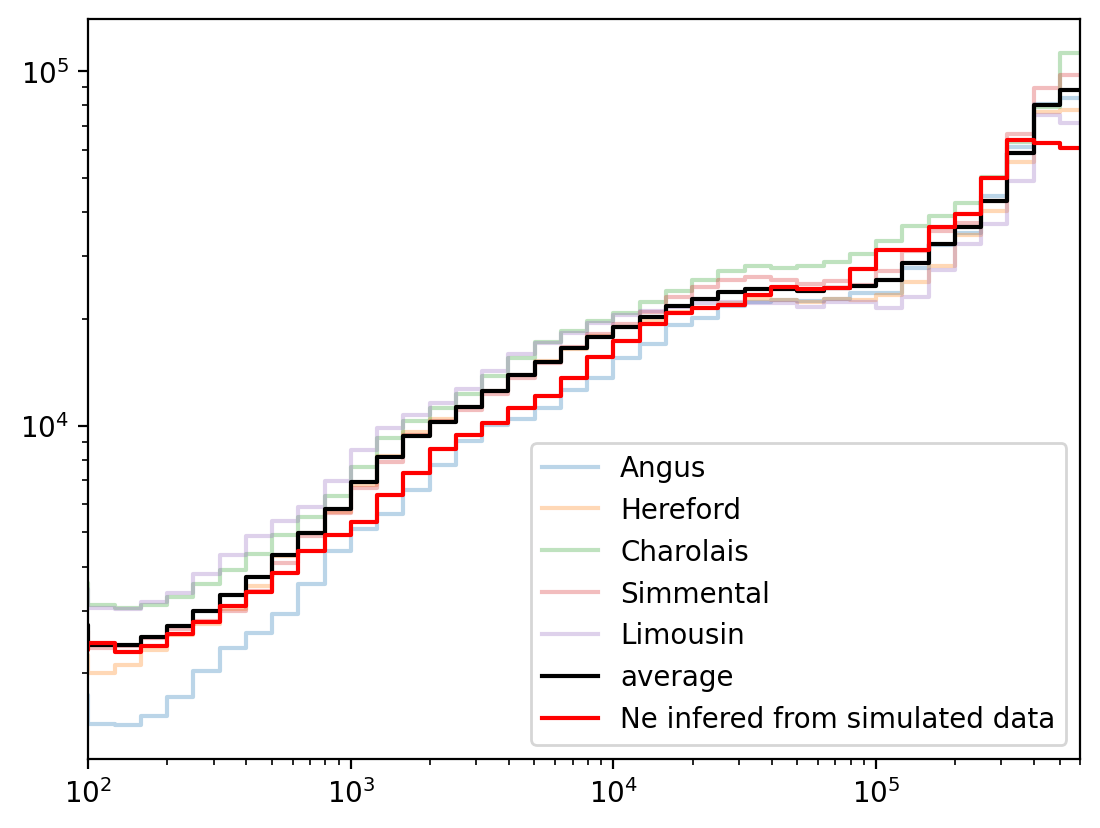

In [40]:
fig, ax = plt.subplots()
for breed in ls_beef:
    ax.step(ay_epoch * 6, breed2ne[breed], label=breed, alpha=0.3)
ax.step(ay_epoch * 6, ay_ne_mean, label='average', c='black')
ax.step(ay_epoch_infer * 6, 0.5 / ay_coal_infer, label='Ne infered from simulated data', color='red')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=100, right=600_000)
ax.legend()

## choose snp for clues

In [60]:
with gzip.open('./Average_100_individuals_Chr1_Hudson_pararelate.mut.gz', 'rt') as f_in:
    next(f_in)
    for num, _ in enumerate(f_in):
        pass

In [61]:
print(num)

1144570


In [64]:
st_ex = set([int(snp.strip().split('_')[1]) for snp in gzip.open('04.tree_quality/Average_100_individuals_Chr1_Hudson_pararelate_update.exclude.txt.gz', 'rt')])

In [67]:
ls_snp = []

In [68]:
with gzip.open('./Average_100_individuals_Chr1_Hudson_pararelate.mut.gz', 'rt') as f_in:
    next(f_in)
    for line in f_in:
        pos = int(line.strip().split(';')[1])
        if pos not in st_ex:
            ls_snp.append(pos)

In [69]:
len(ls_snp)

1006489

In [72]:
with open('100th_snp_for_clues.txt', 'w') as f_out:
    for index, snp in enumerate(ls_snp, start=1):
        if index % 100 == 0:
            f_out.write(f'{snp}\n')

In [77]:
ls_snp_clues = [line.strip() for line in open('100th_snp_for_clues.txt')]

In [82]:
chunk_size = 11

In [83]:
for index in range(0, len(ls_snp_clues), chunk_size):
    ls_snp_chunk = ls_snp_clues[index: index + chunk_size]
    folder_num = index // chunk_size
    if not os.path.exists(f'05.clues/interval_{folder_num}'):
        os.makedirs(f'05.clues/interval_{folder_num}')
    with open(f'05.clues/interval_{folder_num}/pos_list.txt', 'w') as f_pos:
        for snp in ls_snp_chunk:
            f_pos.write(f'{snp}\n')

## clues results

In [41]:
ls_lglr = []

In [42]:
for iv in range(915):
    with open(f'05.clues/log/02.clues_interval_{iv}.o', 'r') as f_o:
        for line in f_o:
            if line.strip().startswith('logLR: '):
                ls_lglr.append(float(line.strip().replace('logLR: ', '')))

In [44]:
ay_lglr = np.array(ls_lglr)

In [45]:
np.percentile(ay_lglr, 99)

2.232580000000001

In [68]:
per95 = np.percentile(ay_lglr, 95)
per99 = np.percentile(ay_lglr, 99)
per999 = np.percentile(ay_lglr, 99.9)

In [69]:
print(per95, per99, per999)

1.3322599999999991 2.232580000000001 3.6700009000000153


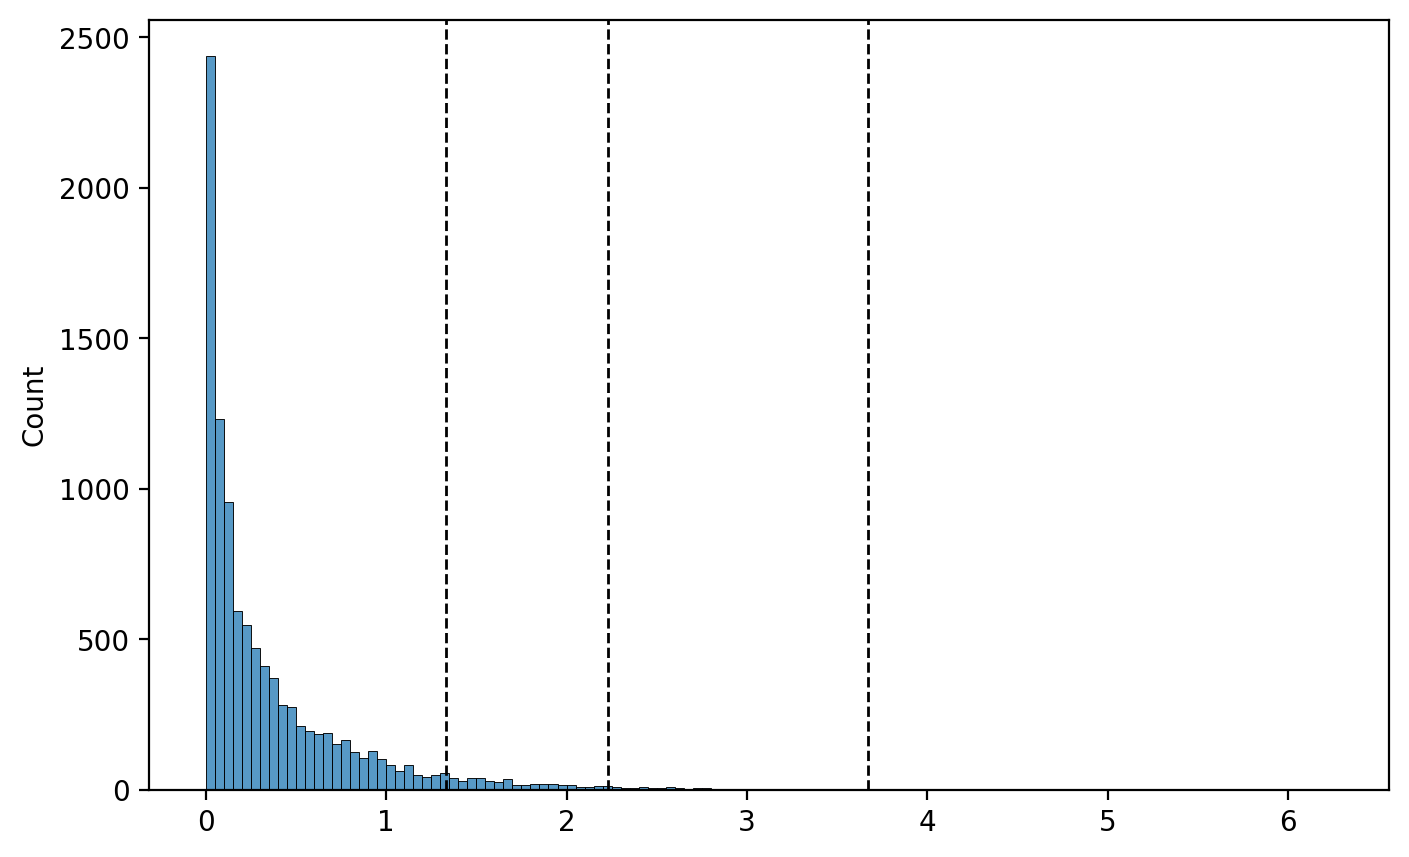

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(ay_lglr, binwidth=0.05)
ax.axvline(np.percentile(ay_lglr, 95), ls='--', lw=1, color='black')
ax.axvline(np.percentile(ay_lglr, 99), ls='--', lw=1, color='black')
ax.axvline(np.percentile(ay_lglr, 99.9), ls='--', lw=1, color='black')

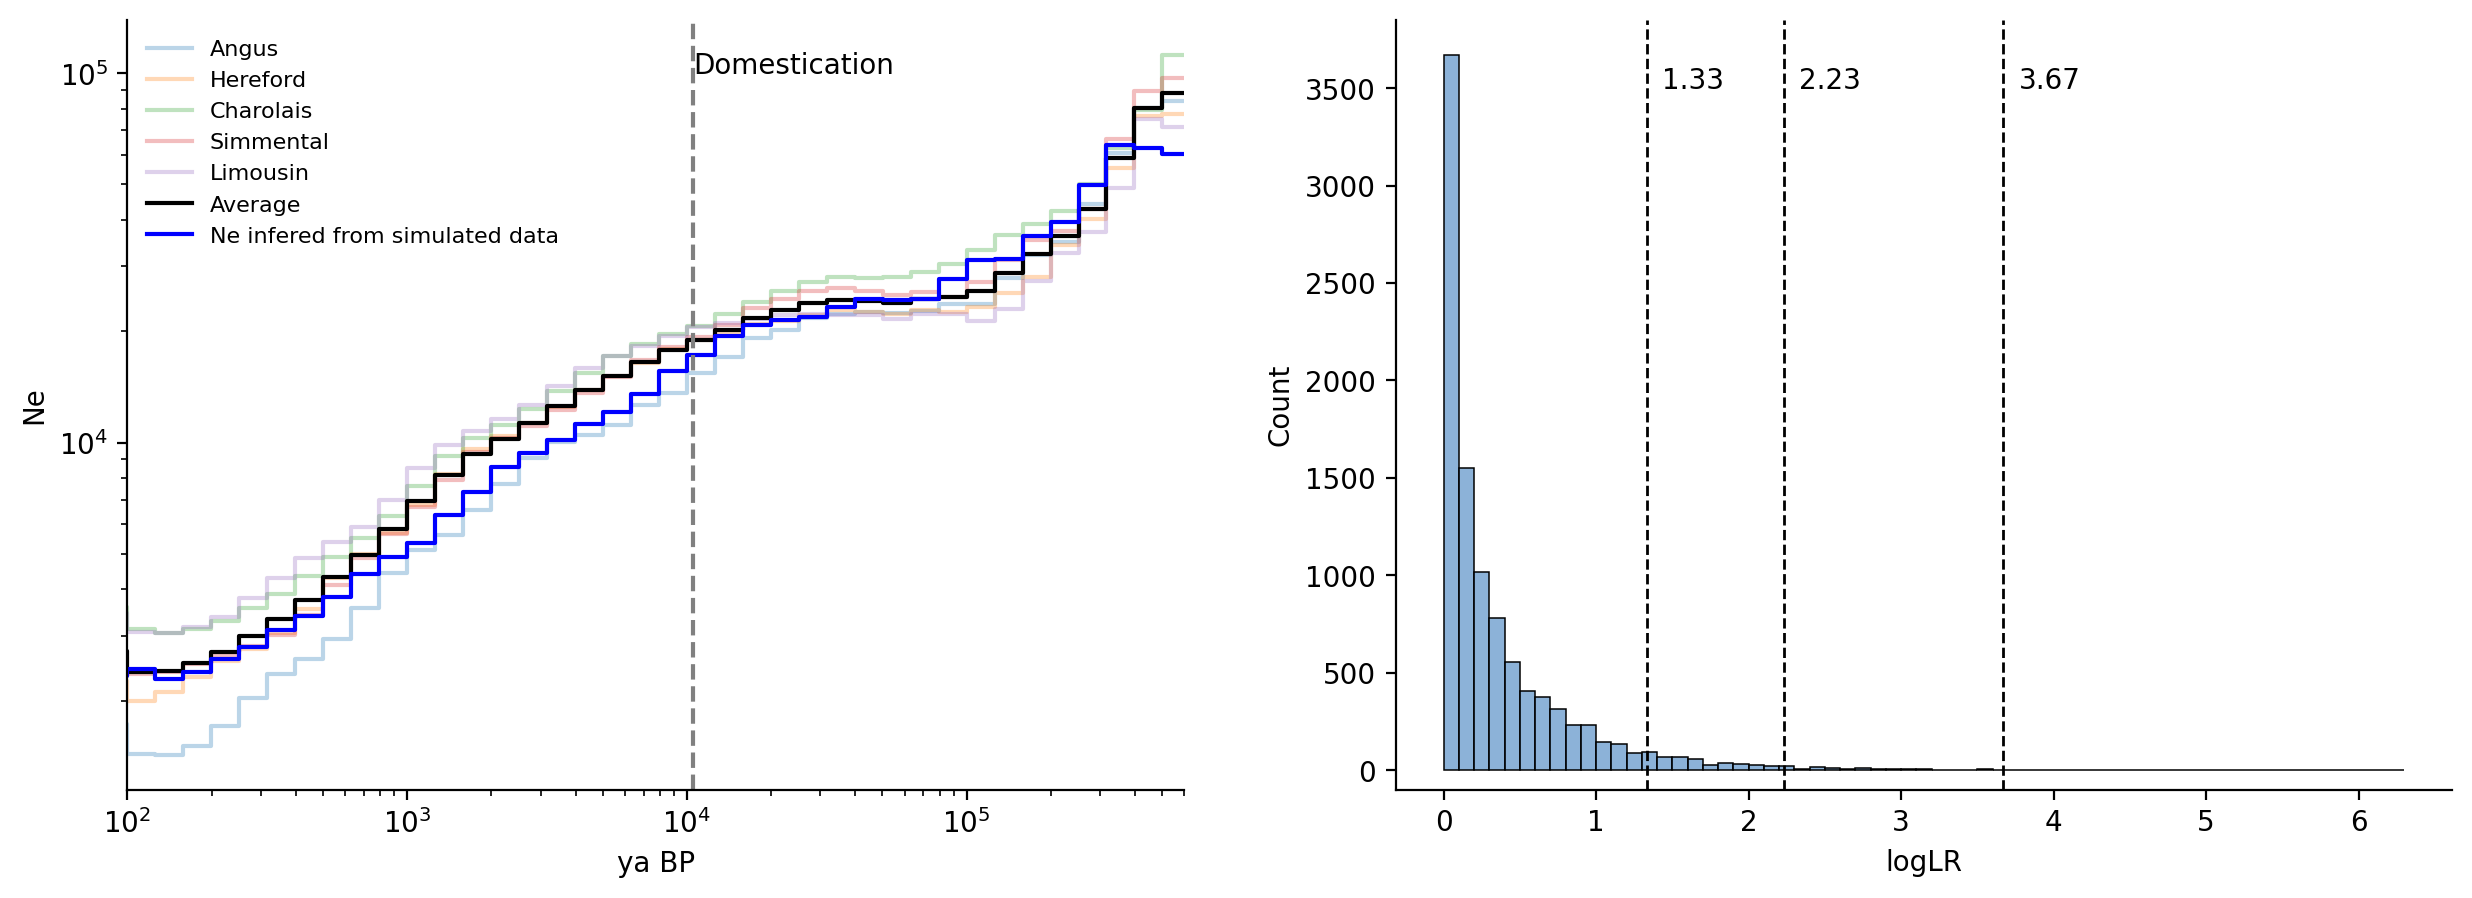

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for breed in ls_beef:
    axes[0].step(ay_epoch * 6, breed2ne[breed], label=breed, alpha=0.3)
axes[0].step(ay_epoch * 6, ay_ne_mean, label='Average', c='black')
axes[0].step(ay_epoch_infer * 6, 0.5 / ay_coal_infer, label='Ne infered from simulated data', color='blue')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim(left=100, right=600_000)
axes[0].legend(frameon=False, fontsize=8)
axes[0].set_xlabel('ya BP')
axes[0].set_ylabel('Ne')
axes[0].axvline(x=1_0500, ls='--', color='grey')

sns.histplot(ay_lglr, binwidth=0.1, color='#6699cc', ax=axes[1])
axes[1].axvline(np.percentile(ay_lglr, 95), ls='--', lw=1, color='black')
axes[1].axvline(np.percentile(ay_lglr, 99), ls='--', lw=1, color='black')
axes[1].axvline(np.percentile(ay_lglr, 99.9), ls='--', lw=1, color='black')
axes[1].set_xlabel('logLR')
axes[1].set_ylabel('Count')
axes[1].set_ylim(bottom=-100)

for col in [0, 1]:
    axes[col].spines['top'].set_visible(False)
    axes[col].spines['right'].set_visible(False)

##annotaion
axes[0].annotate('Domestication', xy=(1_0500, 100_000))

for per in [per95, per99, per999]:
    axes[1].annotate(round(per, 2), xy=(per + 0.1, 3500))